<a href="https://colab.research.google.com/github/ankit-144/Image-classification-ANN-/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape


(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# New Section

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

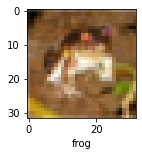

In [ ]:
plot_sample(X_train, y_train, 0)

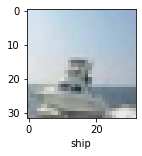

In [ ]:
plot_sample(X_train, y_train, 100)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(2000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8224 - accuracy: 0.3495
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6168 - accuracy: 0.4251
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5284 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 13s 9ms/step - loss: 1.4622 - accuracy: 0.4813
Epoch 5/5
1563/1563 [==============================] - 13s 9ms/step - loss: 1.4068 - accuracy: 0.4996


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 6ms/step - loss: 1.4481 - accuracy: 0.4760
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1002 - accuracy: 0.6117
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9657 - accuracy: 0.6638
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8763 - accuracy: 0.6940
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8027 - accuracy: 0.7202
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7423 - accuracy: 0.7409
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6915 - accuracy: 0.7608
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6454 - accuracy: 0.7737
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6072 - accuracy: 0.7877
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.8984 - accuracy: 0.7112


[0.8984289169311523, 0.7111999988555908]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[9.9544823e-03, 2.1737987e-05, 2.5001757e-03, 9.0383565e-01,
        1.1995060e-03, 4.2868007e-02, 9.8857237e-04, 4.3048785e-04,
        3.7482481e-02, 7.1889581e-04],
       [2.7237629e-04, 3.2277801e-03, 2.8780519e-08, 1.6467611e-07,
        1.8178480e-10, 1.2006622e-11, 7.4261086e-10, 1.5802536e-10,
        9.9643803e-01, 6.1597886e-05],
       [2.6631810e-02, 5.1850259e-01, 8.5033843e-04, 2.8935876e-03,
        9.0436562e-04, 8.1150502e-05, 1.3148293e-04, 3.0663447e-03,
        4.1110551e-01, 3.5832848e-02],
       [8.3215761e-01, 2.0368768e-02, 2.4822000e-02, 8.0960728e-03,
        1.8036712e-03, 2.2327329e-05, 1.8040910e-04, 6.2770263e-04,
        1.1178366e-01, 1.3786653e-04],
       [4.0108645e-08, 1.6910481e-05, 4.4233250e-03, 3.3643935e-02,
        2.6130715e-01, 7.0354383e-04, 6.9989467e-01, 1.2236039e-06,
        3.9618199e-06, 5.1932125e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

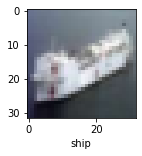

In [ ]:
plot_sample(X_test, y_test,576)

In [ ]:
classes[y_classes[576]]

'ship'

In [ ]:
classes[y_classes[3]]

'airplane'